In [1]:
 from google.colab import drive
 drive.mount('/content/gdrive')
 %cd'gdrive/My Drive/Colab Notebooks/Thesis/Bangladesh/HierarchicalClustering'

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Thesis/Bangladesh/HierarchicalClustering


In [2]:
import pandas as pd
data=pd.read_csv('RegionalDengueCombinedData.csv')
data.head()

,Unnamed: 0,PatientId,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Decision
0,5,122365.0,1,10.0,12.4,35.0,175000.0,5500.0,22.0,74.0,3.0,0.0
1,51,121232.0,1,13.0,14.6,33.5,94000.0,5100.0,69.0,71.5,3.5,1.0
2,140,1251531.0,0,35.0,10.7,32.0,200000.0,3100.0,26.0,69.0,4.0,0.0
3,26,124046.0,1,2.0,10.5,35.3,300000.0,10800.0,58.0,35.0,6.0,0.0
4,124,1250372.0,0,25.0,12.7,39.0,390000.0,7000.0,17.0,79.0,3.0,0.0


In [3]:
df=data.copy()
df.drop(['Unnamed: 0','PatientId','Decision'],axis='columns',inplace=True)
df = df.astype(int)

Hierarchical Clustering

In [4]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, fcluster, leaves_list,linkage
from sklearn.metrics import silhouette_score



<Figure size 720x576 with 0 Axes>

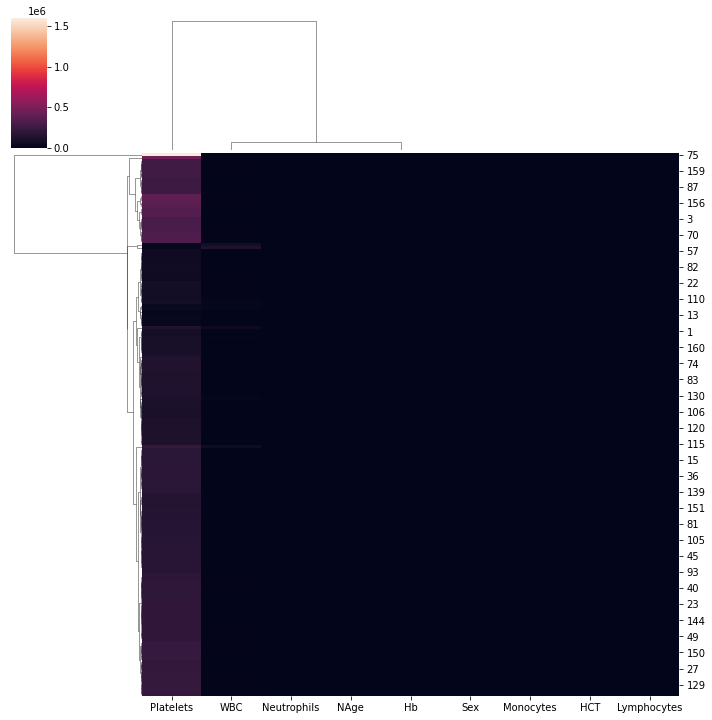

In [5]:
plt.figure(figsize=(10,8))
sns.clustermap(df)

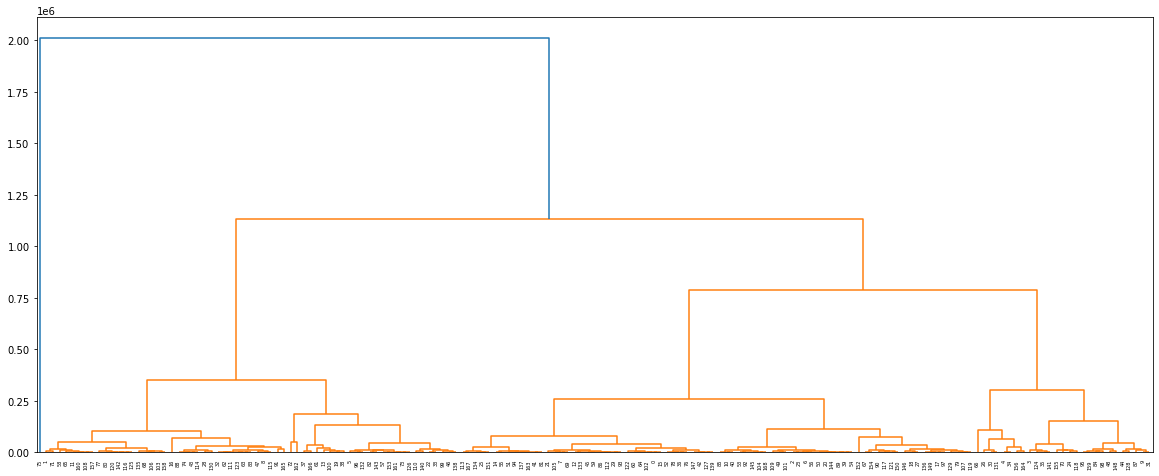

In [6]:
plt.figure(figsize=(20,8))
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))



Silhouette score for determining the number of clusters

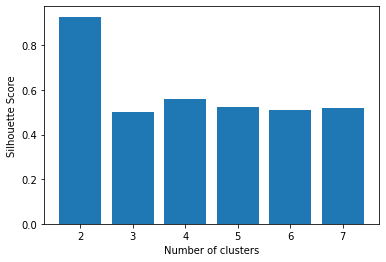

In [7]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [8]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
y=cluster.fit_predict(df)
df['Cluster'] = y
df


,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
0,1,10,12,35,175000,5500,22,74,3,0
1,1,13,14,33,94000,5100,69,71,3,4
2,0,35,10,32,200000,3100,26,69,4,0
3,1,2,10,35,300000,10800,58,35,6,1
4,0,25,12,39,390000,7000,17,79,3,5
...,...,...,...,...,...,...,...,...,...,...
164,0,20,12,38,370000,9800,34,60,3,5
165,1,12,13,41,130000,16350,18,75,7,4
166,1,7,13,40,40000,22900,64,30,5,2
167,0,8,12,37,150000,7300,31,61,6,0


In [9]:
df_0=df.loc[df['Cluster'] == 0]
df_0.describe()
 

,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0
mean,0.487179,16.858974,12.320513,38.679487,189012.820513,6377.089744,29.512821,64.897436,4.179487,0.0
std,0.503071,13.918804,1.694097,4.913521,24340.385760,6388.437970,16.656767,17.632312,1.925520,0.0
min,0.000000,1.000000,10.000000,31.000000,150000.000000,4.000000,6.000000,16.000000,1.000000,0.0
25%,0.000000,6.250000,11.000000,35.000000,170000.000000,4200.000000,17.250000,52.750000,3.000000,0.0
50%,0.000000,12.500000,12.000000,38.500000,187500.000000,5500.000000,26.000000,69.500000,4.000000,0.0
75%,1.000000,23.750000,13.000000,40.750000,205000.000000,7200.000000,37.500000,78.000000,5.000000,0.0
max,1.000000,62.000000,17.000000,51.000000,235000.000000,59009.000000,77.000000,91.000000,9.000000,0.0


In [10]:
df_1=df.loc[df['Cluster'] == 1]
df_1.describe()

,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,0.473684,19.157895,11.736842,36.526316,287052.631579,8512.105263,27.210526,63.000000,3.210526,1.0
std,0.512989,16.707494,1.147079,3.501879,27419.526060,3507.088978,15.859028,21.908902,1.902599,0.0
min,0.000000,1.000000,10.000000,31.000000,250000.000000,3900.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,4.500000,11.000000,35.000000,265000.000000,5415.000000,14.000000,50.000000,2.000000,1.0
50%,0.000000,19.000000,12.000000,35.000000,280000.000000,8200.000000,28.000000,67.000000,3.000000,1.0
75%,1.000000,28.500000,12.000000,37.000000,309000.000000,11100.000000,41.500000,80.000000,4.500000,1.0
max,1.000000,65.000000,14.000000,44.000000,330000.000000,14600.000000,58.000000,87.000000,8.000000,1.0


In [11]:
df_2=df.loc[df['Cluster'] == 2]
df_2.describe()

,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0
mean,0.692308,11.884615,12.846154,40.961538,56692.307692,15625.076923,40.076923,48.269231,4.846154,2.0
std,0.470679,11.500702,2.072531,6.049666,21994.579752,26650.510204,18.493076,20.960072,1.932714,0.0
min,0.000000,1.000000,9.000000,28.000000,12500.000000,2152.000000,8.000000,0.000000,0.000000,2.0
25%,0.000000,4.000000,11.250000,37.000000,32750.000000,4850.000000,29.500000,32.500000,4.000000,2.0
50%,1.000000,7.500000,12.500000,40.500000,65000.000000,7350.000000,39.000000,50.000000,5.000000,2.0
75%,1.000000,16.500000,14.750000,45.000000,73750.000000,10450.000000,54.250000,61.500000,6.000000,2.0
max,1.000000,46.000000,17.000000,52.000000,85000.000000,125000.000000,78.000000,90.000000,9.000000,2.0


In [12]:
df_3=df.loc[df['Cluster'] == 3]
df_3.describe()

,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,10.0,30.0,1600000.0,4100.0,26.0,68.0,5.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,10.0,30.0,1600000.0,4100.0,26.0,68.0,5.0,3.0
25%,1.0,3.0,10.0,30.0,1600000.0,4100.0,26.0,68.0,5.0,3.0
50%,1.0,3.0,10.0,30.0,1600000.0,4100.0,26.0,68.0,5.0,3.0
75%,1.0,3.0,10.0,30.0,1600000.0,4100.0,26.0,68.0,5.0,3.0
max,1.0,3.0,10.0,30.0,1600000.0,4100.0,26.0,68.0,5.0,3.0


In [13]:
df_4=df.loc[df['Cluster'] ==4]
df_4.describe()

,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0
mean,0.783784,14.324324,12.918919,40.405405,119729.729730,6935.405405,40.405405,55.567568,4.054054,4.0
std,0.479301,10.939363,2.019053,5.964988,14352.020084,9000.456345,18.871583,18.676397,1.914070,0.0
min,0.000000,1.000000,8.000000,29.000000,90000.000000,2000.000000,10.000000,4.000000,0.000000,4.0
25%,1.000000,6.000000,12.000000,36.000000,110000.000000,3300.000000,28.000000,48.000000,3.000000,4.0
50%,1.000000,12.000000,13.000000,40.000000,120000.000000,4400.000000,38.000000,56.000000,4.000000,4.0
75%,1.000000,19.000000,14.000000,44.000000,130000.000000,6260.000000,46.000000,68.000000,5.000000,4.0
max,2.000000,43.000000,17.000000,54.000000,141000.000000,55200.000000,94.000000,87.000000,9.000000,4.0


In [14]:
df_5=df.loc[df['Cluster'] ==5]
df_5.describe()

,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0
mean,0.25000,18.375000,11.000000,34.125000,377125.000000,8412.500000,21.625000,72.750000,4.375000,5.0
std,0.46291,19.551671,1.069045,3.563205,33867.124809,2940.086248,12.614476,13.024702,2.615203,0.0
min,0.00000,1.000000,10.000000,29.000000,344000.000000,4800.000000,9.000000,50.000000,2.000000,5.0
25%,0.00000,2.500000,10.000000,31.750000,352500.000000,6725.000000,11.500000,65.250000,3.000000,5.0
50%,0.00000,12.000000,11.000000,33.500000,372500.000000,7650.000000,19.500000,76.000000,3.000000,5.0
75%,0.25000,30.250000,12.000000,37.250000,390000.000000,9875.000000,26.500000,81.000000,5.000000,5.0
max,1.00000,47.000000,12.000000,39.000000,448000.000000,14200.000000,45.000000,87.000000,9.000000,5.0


In [15]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y=cluster.fit_predict(df)
df['Cluster'] = y
df


,Sex,NAge,Hb,HCT,Platelets,WBC,Lymphocytes,Neutrophils,Monocytes,Cluster
0,1,10,12,35,175000,5500,22,74,3,0
1,1,13,14,33,94000,5100,69,71,3,2
2,0,35,10,32,200000,3100,26,69,4,0
3,1,2,10,35,300000,10800,58,35,6,0
4,0,25,12,39,390000,7000,17,79,3,0
...,...,...,...,...,...,...,...,...,...,...
164,0,20,12,38,370000,9800,34,60,3,0
165,1,12,13,41,130000,16350,18,75,7,2
166,1,7,13,40,40000,22900,64,30,5,2
167,0,8,12,37,150000,7300,31,61,6,0


In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [17]:
X=df.copy()
X.drop(['Cluster'],axis='columns', inplace = True)
y=df.Cluster
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

[0.04481007 0.05523496 0.05396245 0.07908679 0.4661308  0.08655236
 0.08690243 0.08189059 0.04542953]


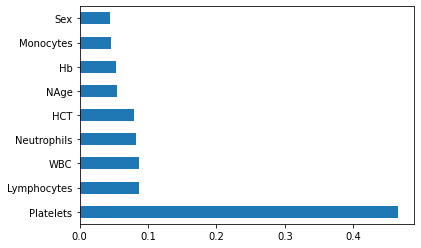

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [19]:
xg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate=1,
                 alpha = 10, n_estimators = 10)
xg_model=xg.fit(X_train, y_train)
predictions = xg.predict(X_test)

    
    
print("Accuracy score (training): {0:.3f}".format(xg.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(xg.score(X_test, y_test)))

Accuracy score (training): 1.000
Accuracy score (validation): 1.000


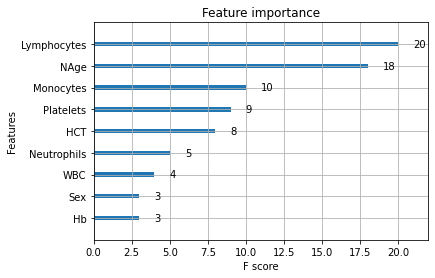

In [20]:
xgb.plot_importance(xg_model)
plt.show()

In [21]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 14.1 MB/s 


In [22]:
import shap
shap_values = shap.TreeExplainer(xg_model).shap_values(X)

In [23]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type=’bar’)

SyntaxError: ignored

In [ ]:
sns.set(font_scale=1.7)
sns.pairplot(df,hue='Cluster',size=3, palette=['red','green','dodgerblue'])

In [ ]:
df_3_0=df.loc[df['Cluster'] ==2]
df_3_0.loc[(df_3_0['Platelets'] < 100000)|(df_3_0['HCT'] > 20), 'Decision'] = 1  #Severe
df_3_0.loc[(df_3_0['Platelets'] >=100000)|(df_3_0['HCT'] <= 20), 'Decision'] = 0  #Less Severe
df_3_0.head()

df_3_1=df_3_0.loc[df_3_0['Decision'] ==0]
df_3_1.info()

In [ ]:
sns.set(font_scale=1.7)
sns.pairplot(df_3_0,hue='Decision',size=3, palette=['orange','dodgerblue'])

In [ ]:
df_3_1=df.loc[df['Cluster'] ==1]
df_3_1.describe()


In [ ]:
df_3_2=df.loc[df['Cluster'] ==2]
df_3_2.describe()


In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y=cluster.fit_predict(df)
df['Cluster'] = y
df


In [ ]:
!pip install shap

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
X=df.copy()
X.drop(['Cluster'],axis='columns', inplace = True)
y=df.Cluster
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
xg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate=1, alpha = 10, n_estimators = 10)
xg_model=xg.fit(X_train, y_train)
predictions = xg.predict(X_test)

In [ ]:
import shap
import matplotlib.pylab as pl

In [ ]:
shap_values = shap.TreeExplainer(xg_model).shap_values(X)

In [ ]:
# Visualizing the clustering 
plt.scatter(df['HCT'], df['Platelets'],  
           c = AgglomerativeClustering(n_clusters =3 ).fit_predict(df), cmap =plt.cm.plasma) 
plt.show() 

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
shap.dependence_plot("Platelets", shap_values[0], X)

In [ ]:
df_4_0=df.loc[df['Cluster'] ==0]
df_4_0.describe()


In [ ]:
df_4_1=df.loc[df['Cluster'] ==1]
df_4_1.describe()


In [ ]:
df_4_2=df.loc[df['Cluster'] ==2]
df_4_2.describe()


In [ ]:
df_4_3=df.loc[df['Cluster'] ==3]
df_4_3.describe()


Standardizing data

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize

In [ ]:
# Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)


In [ ]:
# Normalizing the Data 
normalized_df = normalize(scaled) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
normalized_df.head()

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y=cluster.fit_predict(normalized_df)
normalized_df['Cluster'] = y
normalized_df


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

In [ ]:
plt.figure(figsize =(10,8)) 
plt.title('Visualising the data') 
Dendrogram = sch.dendrogram((sch.linkage(X_principal, method ='ward'))) 

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.plasma) 
plt.show() 

In [ ]:
# Visualizing the clustering 
plt.scatter(df['Monocytes'], df['Platelets'],  
           c = AgglomerativeClustering(n_clusters =33 ).fit_predict(X_principal), cmap =plt.cm.plasma) 
plt.show() 

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y=cluster.fit_predict(X_principal)
X_principal['Cluster'] = y
X_principal.head(5)

In [ ]:
X_0=X_principal.loc[X_principal['Cluster'] ==0]
X_0.describe()


In [ ]:
X_1=X_principal.loc[X_principal['Cluster'] ==1]
X_1.describe()


In [ ]:
X_2=X_principal.loc[X_principal['Cluster'] ==2]
X_2.describe()
